# Different Color Spaces 
In 1975, the Hungarian Patent HU170062 introduced a puzzle with only one correct solution out of 43 quintillion possible combinations. This puzzle, now known as the Rubik’s Cube, became a worldwide sensation, with over 350 million sold by January 2009.

Recently, my friend Mark shared his idea of creating an automated Rubik’s Cube solver using computer vision. His approach involved using color segmentation to figure out the cube’s current state. While the color detection worked well in his room during the evening, it failed when he tried it outside in the daytime.

Mark asked for my help, and I quickly saw the issue. Like many beginners in computer vision, he wasn’t considering how different lighting conditions could affect color detection. This is a common challenge in many color-based tasks like skin tone detection or traffic light recognition. Now, we need to help him improve his system so it can handle changing lighting conditions and work reliably for his Rubik’s Cube solver.

In this section, we will cover some important color spaces used in computer vision. We will not describe the theory behind them as it can be found on Wikipedia. Instead, we will develop a basic intuition and learn some important properties which will be useful in making decisions later on.

Let us load 2 images of the same cube. It will get loaded in BGR format by default. We can convert between different colorspaces using the OpenCV function cvtColor() as will be shown later.

## 1. Imports

In [1]:
import cv2
import matplotlib.pyplot as plt

## A. The RGB Color Space
The RGB colorspace has the following properties

    - It is an additive colorspace where colors are obtained by a linear combination of Red, Green, and Blue values.
    - The three channels are correlated by the amount of light hitting the surface.

Let us split the two images into their R, G and B components and observe them to gain more insight into the color space.

In [2]:
image_path = "./images/out_rubiks.png"
image = cv2.imread(image_path)

# Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

In [3]:
# Split the image into R, G, B channels
R_image, G_image, B_image = cv2.split(image)

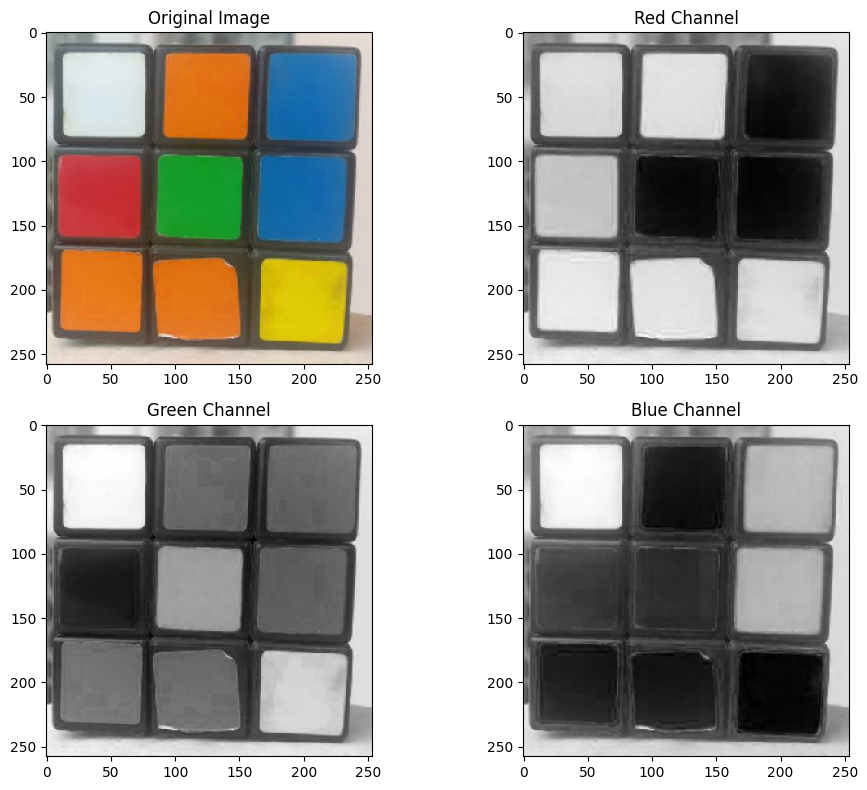

In [4]:
# Plot the original image and the RGB components
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title(f'Original Image')

# Red channel image
plt.subplot(2, 2, 2)
plt.imshow(R_image, cmap="gray")
plt.title(f'Red Channel')

# Green channel image
plt.subplot(2, 2, 3)
plt.imshow(G_image, cmap="gray")
plt.title(f'Green Channel')

# Blue channel image
plt.subplot(2, 2, 4)
plt.imshow(B_image, cmap="gray")
plt.title(f'Blue Channel')

plt.tight_layout()
plt.show()

## B. The LAB Color-Space
The Lab color space has three components.

- L – Lightness ( Intensity ).
- a – color component ranging from Green to Magenta.
- b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

It has the following properties.  
- Perceptually uniform color space which approximates how we perceive color.
- Independent of device ( capturing or displaying ).
- Used extensively in Adobe Photoshop.
- Is related to the RGB color space by a complex transformation equation.

Let us see the two images in the Lab color space separated into three channels.

In [7]:
out_img_path = "./images/out_rubiks.png"
in_img_path = "./images/ind_rubiks.png"

bright = cv2.imread(out_img_path)
dark = cv2.imread(in_img_path)

brightLAB = cv2.cvtColor(bright, cv2.COLOR_BGR2LAB)
darkLAB = cv2.cvtColor(dark, cv2.COLOR_BGR2LAB)

In [8]:
brightL, brightA, brightB = cv2.split(brightLAB)
darkL, darkA, darkB = cv2.split(darkLAB)

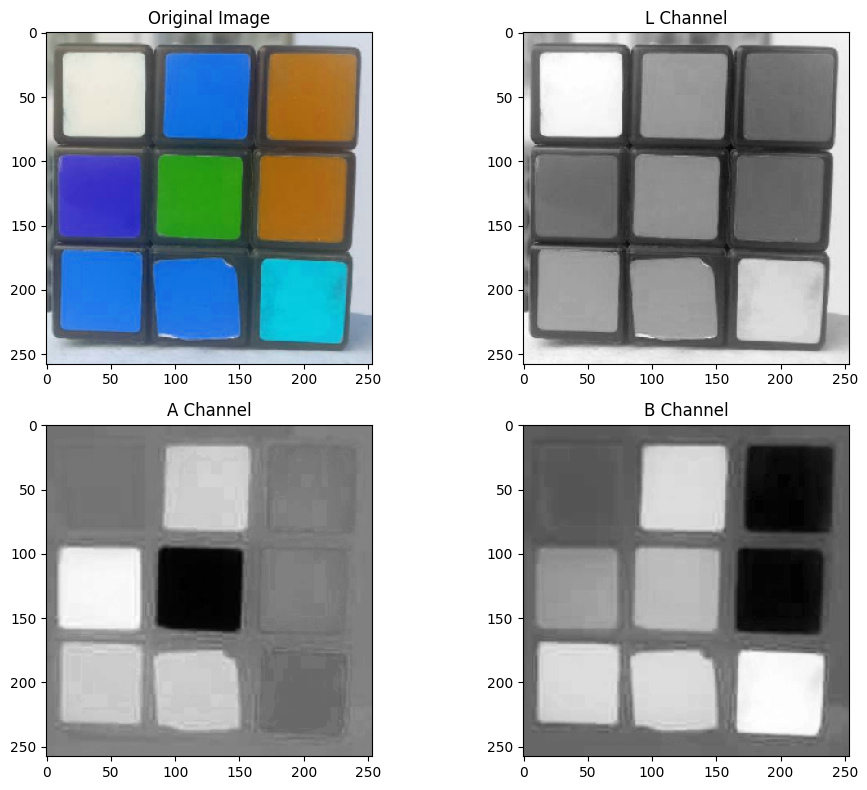

In [9]:
# Plot the original image and the RGB components
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(bright)
plt.title(f'Original Image')

# Red channel image
plt.subplot(2, 2, 2)
plt.imshow(brightL, cmap="gray")
plt.title(f'L Channel')

# Green channel image
plt.subplot(2, 2, 3)
plt.imshow(brightA, cmap="gray")
plt.title(f'A Channel')

# Blue channel image
plt.subplot(2, 2, 4)
plt.imshow(brightB, cmap="gray")
plt.title(f'B Channel')

plt.tight_layout()
plt.show()

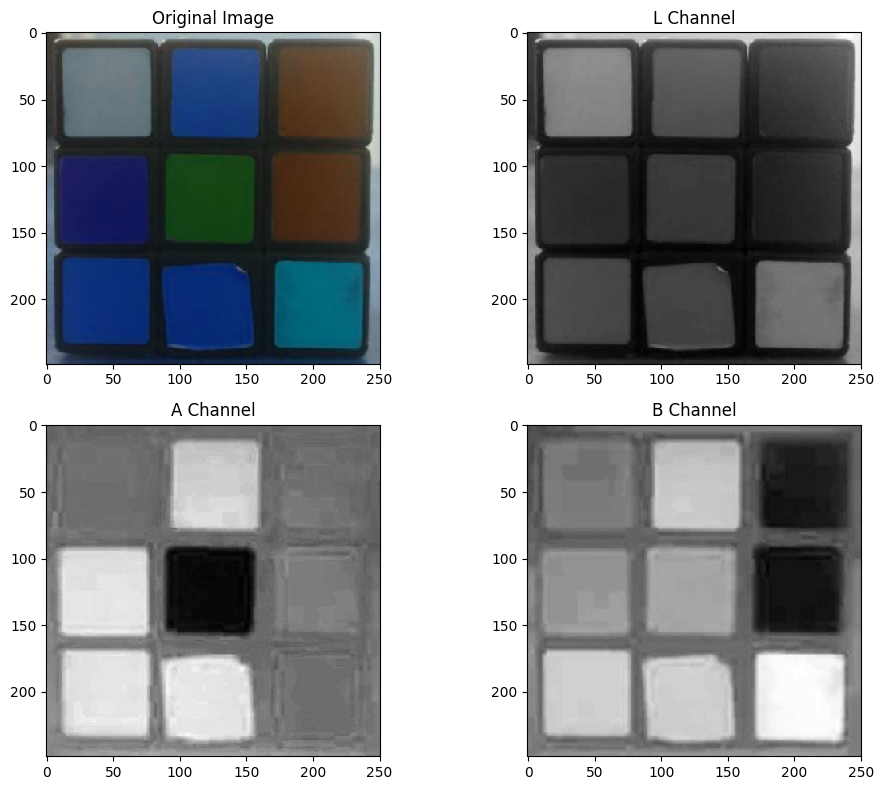

In [10]:
# Plot the original image and the RGB components
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(dark)
plt.title(f'Original Image')

# Red channel image
plt.subplot(2, 2, 2)
plt.imshow(darkL, cmap="gray")
plt.title(f'L Channel')

# Green channel image
plt.subplot(2, 2, 3)
plt.imshow(darkA, cmap="gray")
plt.title(f'A Channel')

# Blue channel image
plt.subplot(2, 2, 4)
plt.imshow(darkB, cmap="gray")
plt.title(f'B Channel')

plt.tight_layout()
plt.show()

**Observations**
- It is pretty clear from the figure that the change in illumination has mostly affected the L component.
- The A and B components which contain the color information did not undergo massive changes.
- The respective values of Green, Orange and Red ( which are the extremes of the A Component ) has not changed in the B Component and similarly the respective values of Blue and Yellow ( which are the extremes of the B Component ) has not changed in the A component.


## C. The YCrCb Color-Space
The YCrCb color space is derived from the RGB color space and has the following three compoenents.

- Y – Luminance or Luma component obtained from RGB after gamma correction.
- Cr = R – Y ( how far is the red component from Luma ).
- Cb = B – Y ( how far is the blue component from Luma ).

This color space has the following properties.

- Separates the luminance and chrominance components into different channels.
- Mostly used in compression ( of Cr and Cb components ) for TV Transmission.
- Device dependent.


In [11]:
brightYCB = cv2.cvtColor(bright, cv2.COLOR_BGR2YCrCb)
darkYCB = cv2.cvtColor(dark, cv2.COLOR_BGR2YCrCb)

In [13]:
brightY, brightC, brightB = cv2.split(brightYCB)
darkY, darkC, darkB = cv2.split(darkYCB)

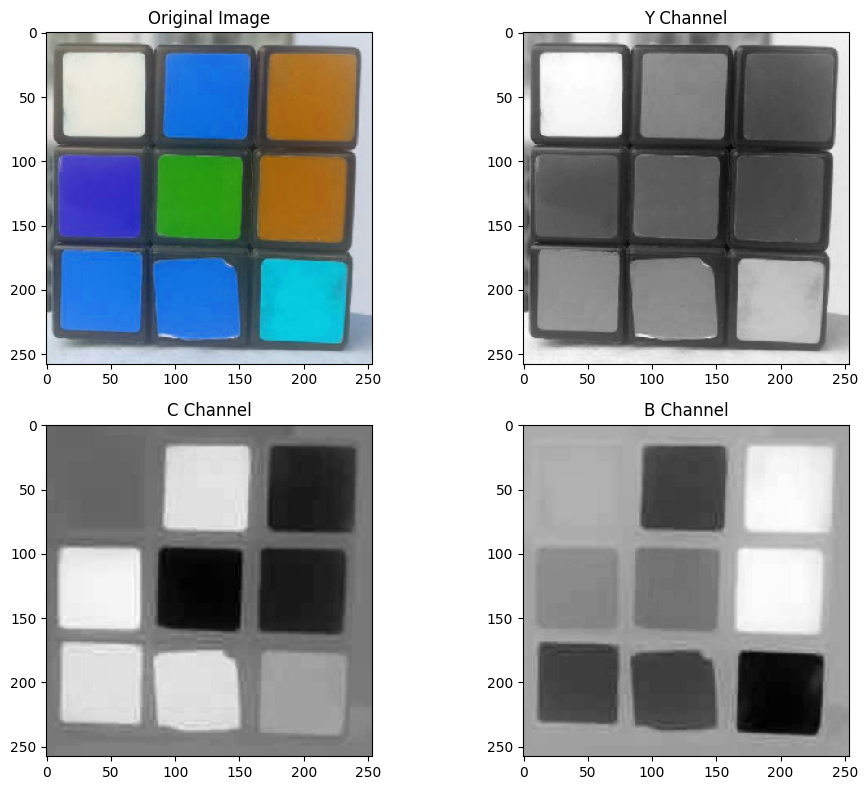

In [14]:
# Plot the original image and the RGB components
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(bright)
plt.title(f'Original Image')

# Red channel image
plt.subplot(2, 2, 2)
plt.imshow(brightY, cmap="gray")
plt.title(f'Y Channel')

# Green channel image
plt.subplot(2, 2, 3)
plt.imshow(brightC, cmap="gray")
plt.title(f'C Channel')

# Blue channel image
plt.subplot(2, 2, 4)
plt.imshow(brightB, cmap="gray")
plt.title(f'B Channel')

plt.tight_layout()
plt.show()

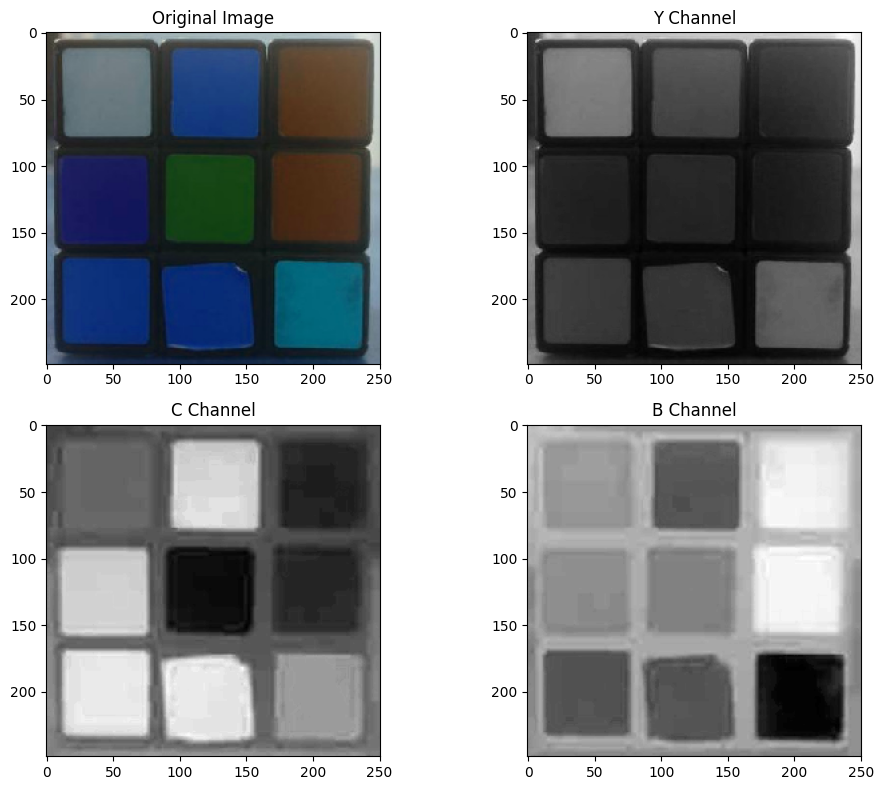

In [15]:
# Plot the original image and the RGB components
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(dark)
plt.title(f'Original Image')

# Red channel image
plt.subplot(2, 2, 2)
plt.imshow(darkY, cmap="gray")
plt.title(f'Y Channel')

# Green channel image
plt.subplot(2, 2, 3)
plt.imshow(darkC, cmap="gray")
plt.title(f'C Channel')

# Blue channel image
plt.subplot(2, 2, 4)
plt.imshow(darkB, cmap="gray")
plt.title(f'B Channel')

plt.tight_layout()
plt.show()

**Observations**
- Similar observations as LAB can be made for Intensity and color components with regard to Illumination changes.
- Perceptual difference between Red and Orange is less even in the outdoor image as compared to LAB.
- White has undergone change in all 3 components.


## D. The HSV Color Space
The HSV color space has the following three components

- H – Hue ( Dominant Wavelength ).
- S – Saturation ( Purity / shades of the color ).
- V – Value ( Intensity ).

Let’s enumerate some of its properties.
- Best thing is that it uses only one channel to describe color (H), making it very intuitive to specify color.
- Device dependent.

The H, S and V components of the two images are shown below.

In [16]:
brightHSV = cv2.cvtColor(bright, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(dark, cv2.COLOR_BGR2HSV)

In [17]:
brightH, brightS, brightV = cv2.split(brightHSV)
darkH, darkS, darkV = cv2.split(darkHSV)

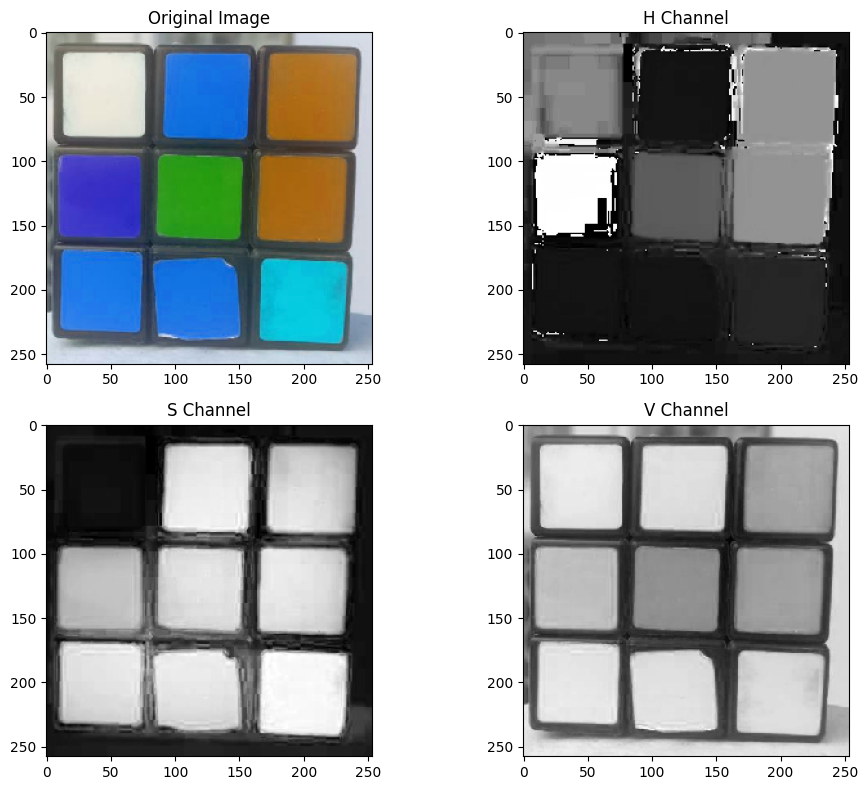

In [18]:
# Plot the original image and the RGB components
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(bright)
plt.title(f'Original Image')

# Red channel image
plt.subplot(2, 2, 2)
plt.imshow(brightH, cmap="gray")
plt.title(f'H Channel')

# Green channel image
plt.subplot(2, 2, 3)
plt.imshow(brightS, cmap="gray")
plt.title(f'S Channel')

# Blue channel image
plt.subplot(2, 2, 4)
plt.imshow(brightV, cmap="gray")
plt.title(f'V Channel')

plt.tight_layout()
plt.show()

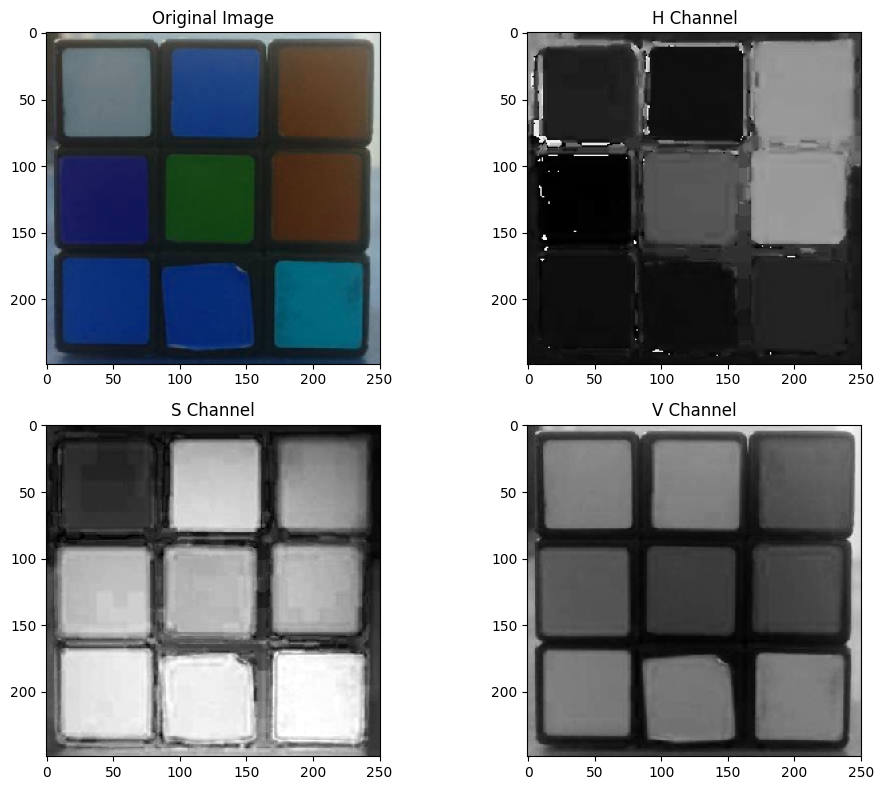

In [19]:
# Plot the original image and the RGB components
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(dark)
plt.title(f'Original Image')

# Red channel image
plt.subplot(2, 2, 2)
plt.imshow(darkH, cmap="gray")
plt.title(f'H Channel')

# Green channel image
plt.subplot(2, 2, 3)
plt.imshow(darkS, cmap="gray")
plt.title(f'S Channel')

# Blue channel image
plt.subplot(2, 2, 4)
plt.imshow(darkV, cmap="gray")
plt.title(f'V Channel')

plt.tight_layout()
plt.show()